# Titanic: Machine Learning from Disaster

In [1]:
# https://www.kaggle.com/c/titanic

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_dummies = pd.get_dummies(train, columns=['Sex', 'Pclass', 'Embarked'])
test_dummies = pd.get_dummies(test, columns=['Sex', 'Pclass', 'Embarked'])

In [7]:
train_dummies.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


## Preprocess data

In [8]:
# Extract features
X_train = train_dummies.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X_test = test_dummies.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

#X_train

In [9]:
# Extract targets
y_train = train_dummies['Survived']



In [10]:
np.mean(X_train);

In [11]:
# Fill NA values
from sklearn.preprocessing import Imputer
# Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
imputer = Imputer()
imputer.fit(X_train)
X_test_filled= imputer.transform(X_test)
X_train_inputed = imputer.transform(X_train)



In [12]:
# Scale features
from sklearn.preprocessing import StandardScaler
# StandardScaler(copy=True, with_mean=True, with_std=True)
scaler = StandardScaler()
scaler.fit(X_train_inputed)
X_train_scaled = scaler.transform(X_train_inputed)
X_test_scaled = scaler.transform(X_test_filled)


## Train model and make predictions

In [13]:
# Fit logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.ensemble import RandomForestClassifier
# LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
#                    fit_intercept=True, intercept_scaling=1, class_weight=None, 
#                    random_state=None, solver='liblinear', max_iter=100,
#                    multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

#model = LogisticRegression(C=10000.0, solver='newton-cg').fit(X_train_scaled, y_train)
model = RandomForestClassifier().fit(X_train_scaled, y_train)

In [14]:
predicted = model.predict(X_train_scaled)
predicted1 = model.predict(X_test_scaled)

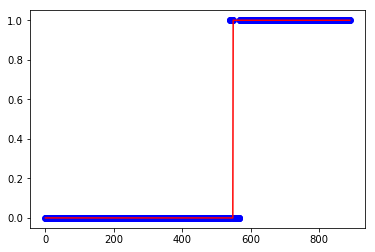

In [15]:
# TODO: make predictions


pairs = np.array(sorted(zip(y_train, predicted)))
plt.plot(range(0, len(pairs)), pairs[:,1], 'bo',
         range(0, len(pairs)), pairs[:,0], 'r-',)
plt.show()


## Estimate quality

In [16]:
# Estimate quality
from sklearn.metrics import accuracy_score
# accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
print(accuracy_score(y_train,predicted))

0.968574635241


## Create submission 

In [17]:
with open('submission.txt', 'w') as out:
    out.write('PassengerId,Survived\n')
    for passenger, y in zip(test['PassengerId'], predicted1):
        out.write('%s,%s\n' % (passenger, y))

## CROSS VALIDATION

In [18]:
# Estimate model quality using cross-validation
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#
#   KFold(n_splits=3, shuffle=False, random_state=None)
#
#   cross_val_score(estimator, X, y=None, groups=None, scoring=None,
#                   cv=None, n_jobs=1, verbose=0, fit_params=None, 
#                   pre_dispatch='2*n_jobs')
#
# TODO: estimate average R2 score using 4-fold corss validation

kfold = KFold(n_splits=10, shuffle=True, random_state=1243)

#scores = cross_val_score(LogisticRegression(),
#                         X_train_scaled, y_train, groups=None,
#                         scoring = make_scorer(accuracy_score),
#                         cv = kfold)
#scores

## PIPELINE

In [19]:
from sklearn.pipeline import Pipeline
#
#   Pipeline(steps=[('name', model),])
#
# TODO: 
#  1. combine scaler and linear gregression using pipeline
#  2. etimate quality using cross_val_score

pipeline = Pipeline(steps=[('imputer', imputer),
                           ('scale', scaler),
                           ('model', model)])

In [20]:
scores = cross_val_score(pipeline,
                         X_train, y_train, groups=None,
                         scoring = make_scorer(accuracy_score),
                         cv = kfold)

In [21]:
scores

array([ 0.78888889,  0.74157303,  0.78651685,  0.76404494,  0.88764045,
        0.83146067,  0.84269663,  0.79775281,  0.78651685,  0.80898876])

## GRID

In [54]:
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline(steps=[('imput', imputer),
                           ('scale', scaler),
                           #('model', LogisticRegression(C=1, penalty='l2'))
                           ('model', RandomForestClassifier())
                          ])

#param_grid = {'model__C': [1,10,100,1000,10000]}
param_grid = {'model__max_depth': range(1,100)}

grid = GridSearchCV(pipeline, param_grid, 
                    scoring=make_scorer(accuracy_score),
                    cv=kfold)

In [56]:
model1 = grid.fit(X_train, y_train)
model1.cv_results_['mean_test_score']

array([ 0.78675645,  0.78451178,  0.79910213,  0.81481481,  0.82154882,
        0.81144781,  0.82042649,  0.82267116,  0.81818182,  0.81930415,
        0.82154882,  0.81144781,  0.80359147,  0.80246914,  0.80359147,
        0.79573513,  0.81593715,  0.80695847,  0.80246914,  0.79573513,
        0.8047138 ,  0.79910213,  0.80359147,  0.7979798 ,  0.80022447,
        0.80808081,  0.8013468 ,  0.80246914,  0.80695847,  0.79910213,
        0.7979798 ,  0.79685746,  0.80022447,  0.7979798 ,  0.8047138 ,
        0.79910213,  0.80022447,  0.81369248,  0.80583614,  0.80359147,
        0.81257015,  0.8013468 ,  0.80583614,  0.8013468 ,  0.80808081,
        0.80246914,  0.80359147,  0.79573513,  0.8013468 ,  0.8013468 ,
        0.81032548,  0.79573513,  0.79910213,  0.79461279,  0.8013468 ,
        0.8013468 ,  0.80808081,  0.81144781,  0.80808081,  0.81257015,
        0.80246914,  0.80022447,  0.80583614,  0.79012346,  0.8047138 ,
        0.8047138 ,  0.79685746,  0.81144781,  0.79124579,  0.80

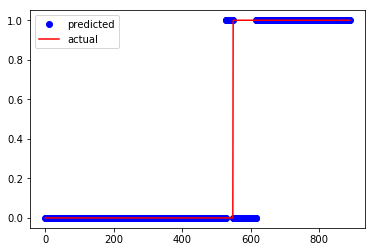

In [57]:
predicted = grid.best_estimator_.predict(X_train)
predicted1= grid.best_estimator_.predict(X_test)

pairs = np.array(sorted(zip(y_train, predicted)))
plt.plot(range(0, len(pairs)), pairs[:, 1], 'bo',
         range(0, len(pairs)), pairs[:, 0], 'r-')

plt.legend(['predicted', 'actual'])
plt.show()

In [58]:
print(accuracy_score(y_train,predicted))

0.900112233446


In [59]:
with open('submission.txt', 'w') as out:
    out.write('PassengerId,Survived\n')
    for passenger, y in zip(test['PassengerId'], predicted1):
        out.write('%s,%s\n' % (passenger, y))